# Bike Share Usage Prediction in London
***
### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

### Reading data

In [2]:
data = pd.read_csv('london_merged.csv')

In [3]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


### Data types

In [4]:
data.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

### Exploratory Data Analysis

In [5]:
data.shape

(17414, 10)

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


### Removing Outliers

In [8]:
# Normalization

def sqrt_transformation(dataframe):
      return np.sqrt(dataframe)


# function for removing outliers

def remove_outliers(dataframe, column):
    q3 = dataframe[column].quantile(0.75)
    q1 = dataframe[column].quantile(0.25)
    IQR = q3 - q1
  
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
    dataframe = dataframe[(dataframe[column] > lower ) & (dataframe[column] < upper)]

    return dataframe

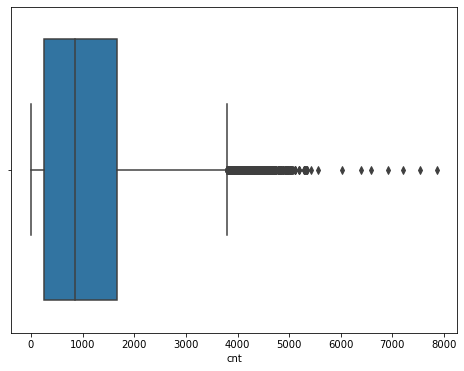

In [9]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'cnt', data = data);

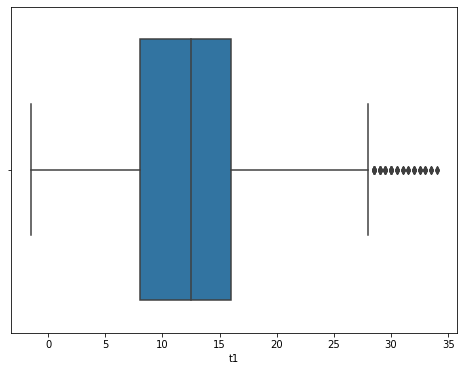

In [10]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 't1', data = data);

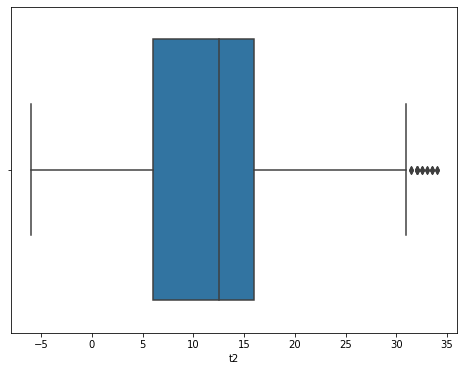

In [11]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 't2', data = data);

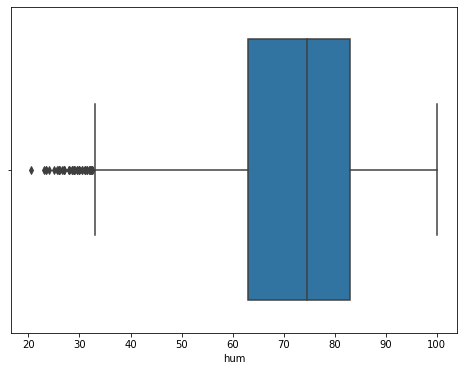

In [12]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'hum', data = data);

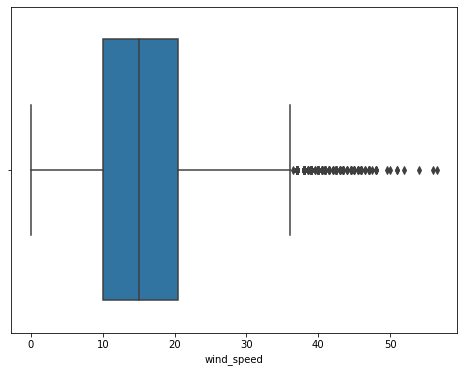

In [13]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'wind_speed', data = data);

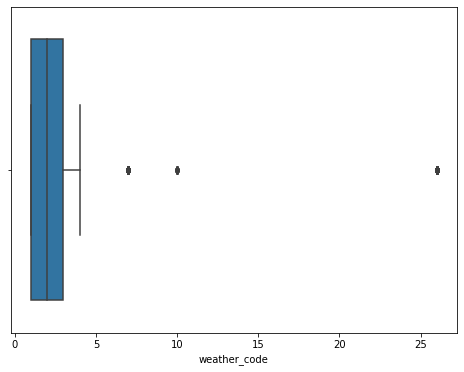

In [14]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'weather_code', data = data);

In [15]:
data = remove_outliers(data,'cnt')
data = remove_outliers(data, 'hum')

### Displot

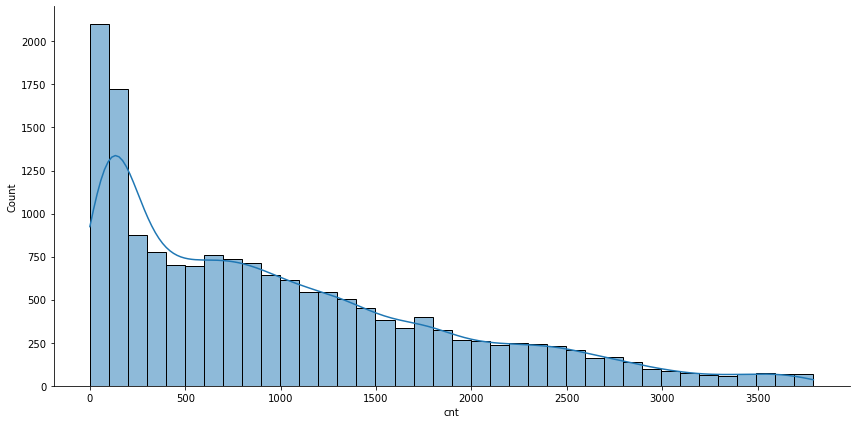

In [16]:
sns.displot(x = 'cnt', data = data, aspect = 2, height = 6, kde = True);

### Coorelation Matrix

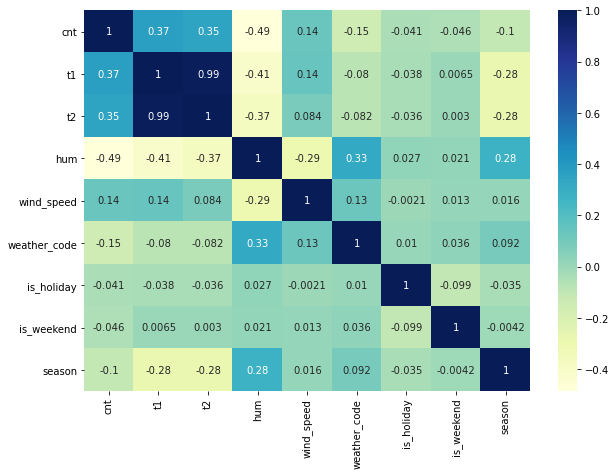

In [17]:
corrmat = data.corr()
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(corrmat, vmax=1, cmap="YlGnBu", annot=True)

### Weather Code

In [18]:
data['weather_code'].value_counts()

1.0     5727
2.0     3826
3.0     3436
7.0     2129
4.0     1455
26.0      60
10.0      14
Name: weather_code, dtype: int64

### Countplot

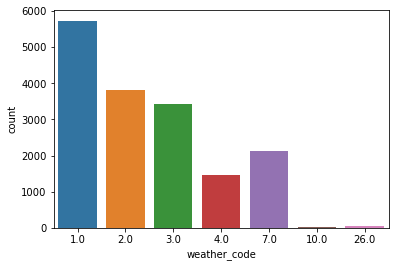

In [19]:
for i in ['weather_code']:
    sns.countplot(x = i, data = data);

### Boxplot

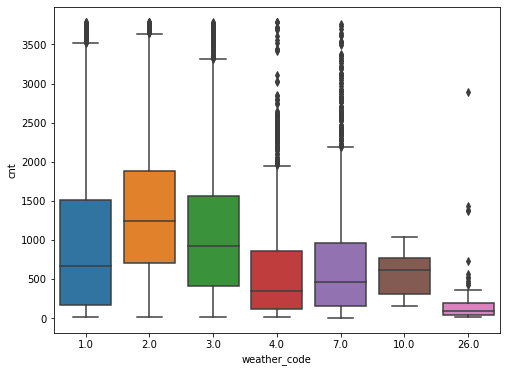

In [20]:
plt.figure(figsize = (8,6))
sns.boxplot(y = 'cnt', x = 'weather_code', data = data);

In [21]:
# convert date (object) into datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%Y%m%d %H:%M:%S')

In [22]:
data['timestamp']

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 16647, dtype: datetime64[ns]

In [23]:
# Seperating all the year, month and hour and visualize them
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['hour'] = data['timestamp'].dt.hour

In [24]:
data.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,2015,1,5
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,6
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,7
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,2015,1,8
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,2015,1,9


### Removing unwanted data 

In [25]:
data = data.drop('timestamp', axis=1)

### Train Test Splitting

In [26]:
X = data.drop('cnt', axis=1)
y = data['cnt']

### Feature Scaling

In [27]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [28]:
X = pd.DataFrame(data = X_scaler, columns = X.columns)

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [30]:
X_train

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour
16560,-1.147437,-1.270578,1.962310,-0.237405,0.518232,-0.153662,1.546771,1.321688,0.969001,1.577585,-0.349909
3081,0.414931,0.496124,-1.446788,-0.866787,-0.324332,-0.153662,-0.646508,-1.337824,-0.997470,-0.425819,0.507287
4223,0.506835,0.572937,0.475363,-0.615035,-0.745613,-0.153662,-0.646508,-0.451320,-0.997470,0.146582,-1.207104
3296,0.231123,0.342498,-0.249977,-0.237405,0.518232,6.507808,-0.646508,-1.337824,-0.997470,-0.425819,-1.635702
1356,-0.963629,-1.270578,0.221494,1.650740,-0.745613,-0.153662,1.546771,-1.337824,-0.997470,-0.998221,1.078751
...,...,...,...,...,...,...,...,...,...,...,...
7813,0.231123,0.342498,0.112693,2.091307,0.096950,-0.153662,1.546771,1.321688,-0.997470,1.577585,0.793019
10955,-1.515053,-1.501018,1.019368,-0.740911,1.782077,-0.153662,1.546771,-1.337824,0.969001,-0.712020,-0.492775
5192,1.609682,1.494694,-0.286244,-0.237405,0.096950,-0.153662,-0.646508,-0.451320,-0.997470,0.432782,0.364421
12172,0.782547,0.803376,0.511630,-0.615035,1.782077,-0.153662,-0.646508,-0.451320,0.969001,-0.139619,0.793019


In [31]:
y_train.values

array([ 376, 1626,   70, ..., 1376, 2872,  660], dtype=int64)

### Training Model

#### Linear Regression Model

In [32]:
lr = LinearRegression(normalize = True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [33]:
lr.score(X_test, y_test)

0.3404387609825418

In [34]:
# Prediction
y_pred = lr.predict(X_test)
y_pred

array([ 922.46504342,  777.90267774, 1087.2992916 , ..., 1174.94232804,
       1310.23353944, 1040.43605423])

In [35]:
# Errors
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))

RMSE: 715.267198
MAE: 535.191271


#### XGBoost

In [36]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
model.score(X_test, y_test)

0.9451878052601718

In [38]:
y_pred = model.predict(X_test)
y_pred

array([616.3757 , 108.82301,  98.76415, ..., 617.8484 , 939.41797,
       684.15784], dtype=float32)

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))

RMSE: 206.195576
MAE: 129.891924


### GUI

In [40]:
    import tkinter as tk
    from tkinter import messagebox

    root=tk.Tk()

    root.title("Bike Share Usage Prediction in London")

    canvas1 = tk.Canvas(root, width = 500, height = 680)
    canvas1.pack()

    label1 = tk.Label(root, text='Temperature')
    canvas1.create_window(150, 100, window=label1)
    entry1 = tk.Entry (root) 
    canvas1.create_window(320, 100, window=entry1)

    label2 = tk.Label(root, text='temperature Feels')
    canvas1.create_window(150, 140, window=label2)
    entry2 = tk.Entry (root)
    canvas1.create_window(320, 140, window=entry2)

    label3 = tk.Label(root, text='Humidity')
    canvas1.create_window(150, 180, window=label3)
    entry3 = tk.Entry (root) 
    canvas1.create_window(320, 180, window=entry3)

    label4 = tk.Label(root, text='Wind Speed')
    canvas1.create_window(150, 220, window=label4)
    entry4 = tk.Entry (root) 
    canvas1.create_window(320, 220, window=entry4)

    label5 = tk.Label(root, text='Weather Code')
    canvas1.create_window(150, 260, window=label5)
    entry5 = tk.Entry (root) 
    canvas1.create_window(320, 260, window=entry5)

    label6 = tk.Label(root, text='Is Holiday')
    canvas1.create_window(150, 300, window=label6)
    entry6 = tk.Entry (root) 
    canvas1.create_window(320, 300, window=entry6)

    label7 = tk.Label(root, text='Is Weekend')
    canvas1.create_window(150, 340, window=label7)
    entry7 = tk.Entry (root) 
    canvas1.create_window(320, 340, window=entry7)

    label8 = tk.Label(root, text='Season')
    canvas1.create_window(150, 380, window=label8)
    entry8 = tk.Entry (root) 
    canvas1.create_window(320, 380, window=entry8)
    
    label9 = tk.Label(root, text='Year')
    canvas1.create_window(150, 420, window=label9)
    entry9 = tk.Entry (root) 
    canvas1.create_window(320, 420, window=entry9)
    
    label10 = tk.Label(root, text='Month')
    canvas1.create_window(150, 460, window=label10)
    entry10 = tk.Entry (root) 
    canvas1.create_window(320, 460, window=entry10)
    
    label11 = tk.Label(root, text='Hour')
    canvas1.create_window(150, 500, window=label11)
    entry11 = tk.Entry (root) 
    canvas1.create_window(320, 500, window=entry11)

    def values():

        global lotf 
        lotf = float(entry1.get()) 
        global lota 
        lota = float(entry2.get())
        global qual 
        qual = float(entry3.get())
        global cond 
        cond = float(entry4.get())
        global yr
        yr = float(entry5.get())
        global msv
        msv = float(entry6.get())
        global rooms
        rooms = float(entry7.get())
        global gtype
        gtype = float(entry8.get())
        global yer
        yer = float(entry9.get())
        global mn
        mn = float(entry10.get())
        global hr
        hr = float(entry11.get())

        your_list = [[lotf, lota, qual, cond, yr, msv, rooms, gtype, yer, mn, hr]]
        Prediction_result  = ('Predicted Count: ', model.predict(pd.DataFrame (your_list,
        columns=['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season','year','month','hour'])))
        label_Prediction = tk.Label(root, text= Prediction_result, bg='lightgreen')
        canvas1.create_window(260, 600, window=label_Prediction)

    button1 = tk.Button (root, text='Predict Usage',command=values, bg='orange') 
    canvas1.create_window(270, 560, window=button1)

    root.mainloop()

### Updated GUI

In [41]:
import datetime
import time
import tkinter as tk
from tkinter import messagebox

window=tk.Tk()

window.title("Bike Share Usage Predictor")
window.geometry("940x800")
window.configure(bg="#113c85")

def main():
     
    global lotf 
    lotf = float(entry1.get()) 
    global lota 
    lota = float(entry2.get())
    global qual 
    qual = float(entry3.get())
    global cond 
    cond = float(entry4.get())
    global yr
    yr = float(entry5.get())
    global msv
    msv = float(entry6.get())
    global rooms
    rooms = float(entry7.get())
    global gtype
    gtype = float(entry8.get())
    global yer
    yer = float(entry9.get())
    global mn
    mn = float(entry10.get())
    global hr
    hr = float(entry11.get())
    
    final_amt.delete(0, tk.END)
    your_list = [[lotf, lota, qual, cond, yr, msv, rooms, gtype, yer, mn, hr]]
    Prediction_result = model.predict(pd.DataFrame (your_list,
    columns=['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season','year','month','hour']))

    final_amt.delete(0, tk.END)

    final_amt.insert(0, str("Predicted counts: "))
    final_amt.insert(10, str(""))
    final_amt.insert(20, str(Prediction_result))
    final_amt.insert(10, str(""))
    final_amt.insert(30, str(""))
    final_amt.insert(40, str(""))
    final_amt.insert(50, str(""))

def clear_all() :

    lotf = entry1.get() 
    lota = entry2.get() 
    qual = entry3.get()
    cond = entry4.get() 
    yr = entry5.get() 
    msv = entry6.get()
    rooms = entry7.get() 
    gtype = entry8.get()
    yer = entry9.get()
    mn = entry10.get()
    hr = entry11.get()

    if( lotf == "" and lota =="" and qual =="" and cond =="" and yr=="" and msv =="" and rooms=="" 
       and gtype =="" and yer =="" and mn == "" and hr ==""):
        tk.messagebox.showinfo("Warning","No data Entered!")
    else:
        entry1.delete(0, tk.END)
        entry2.delete(0, tk.END)
        entry3.delete(0, tk.END) 
        entry4.delete(0, tk.END) 
        entry5.delete(0, tk.END) 
        entry6.delete(0, tk.END) 
        entry7.delete(0, tk.END) 
        entry8.delete(0, tk.END)
        final_amt.delete(0, tk.END)

def show_time():
    text = time.strftime("%A %d %B %Y %H:%M:%S")
    label.config(text=text)
    label.after(200,show_time)

label = tk.Label(font=("Calibiri",15),bg="#113c85", fg="white")
label.grid(column=3, row=1)
show_time()

title = tk.Label(text="Bike Share Usage Prediction",  font=("Alternity",30), fg="white", bg="#113c85")

label1 = tk.Label(text="Temperature ", font=("Candara Bold",20), fg="white", bg="#113c85")
label2 = tk.Label(text="Temperature feels ", font=("Candara Bold",20), fg="white", bg="#113c85")
label3 = tk.Label(text="Humidity ", font=("Candara Bold",20), fg="white", bg="#113c85")
label4 = tk.Label(text='Wind Speed', font=("Candara Bold",20), fg="white", bg="#113c85")
label5 = tk.Label(text='Weather Code', font=("Candara Bold",20), fg="white", bg="#113c85")
label6 = tk.Label(text='Is Holiday', font=("Candara Bold",20), fg="white", bg="#113c85")
label7 = tk.Label(text='Is Weekend', font=("Candara Bold",20), fg="white", bg="#113c85")
label8 = tk.Label(text='Season', font=("Candara Bold",20), fg="white", bg="#113c85")
label9 = tk.Label(text='Year', font=("Candara Bold",20), fg="white", bg="#113c85")
label10 = tk.Label(text='Month', font=("Candara Bold",20), fg="white", bg="#113c85")
label11 = tk.Label(text='Hour', font=("Candara Bold",20), fg="white", bg="#113c85")

label1.grid(row= 3, column=2)
label2.grid(row= 4, column=2)
label3.grid(row= 5, column=2)
label4.grid(row= 6, column=2)
label5.grid(row= 7, column=2)
label6.grid(row= 8, column=2)
label7.grid(row= 9, column=2)
label8.grid(row= 10, column=2)
label9.grid(row= 11, column=2)
label10.grid(row= 12, column=2)
label11.grid(row= 13, column=2)

entry1 = tk.Entry(font=("Candara Bold",15))
entry2 = tk.Entry(font=("Candara Bold",15))
entry3 = tk.Entry(font=("Candara Bold",15))
entry4 = tk.Entry(font=("Candara Bold",15))
entry5 = tk.Entry(font=("Candara Bold",15))
entry6 = tk.Entry(font=("Candara Bold",15))
entry7 = tk.Entry(font=("Candara Bold",15))
entry8 = tk.Entry(font=("Candara Bold",15))
entry9 = tk.Entry(font=("Candara Bold",15))
entry10 = tk.Entry(font=("Candara Bold",15))
entry11 = tk.Entry(font=("Candara Bold",15))

predict_btn = tk.Button(text= "Predict Counts", font=("Candara Bold",13), fg="black", bg="#fcb813",command=main)
delete_btn = tk.Button(text= "CLear All!", font=("Candara Bold",13), fg="white", bg="#D70000",command=clear_all)

final_amt = tk.Entry(font=("Sitka Display Bold Italic",30), fg="white", bg="#113c85", borderwidth=0) #FINAL RESULT
final_amt.grid(column=3, row=50, pady=20,ipadx=220)

title.grid(row= 0, column= 3)
entry1.grid(row= 3, column= 3, padx=10, pady=10)
entry2.grid(row= 4, column= 3, padx=10, pady=10)
entry3.grid(row= 5, column= 3, padx=10, pady=15)
entry4.grid(row= 6, column= 3, padx=10, pady=10)
entry5.grid(row= 7, column= 3, padx=10, pady=10)
entry6.grid(row= 8, column= 3, padx=10, pady=15)
entry7.grid(row= 9, column= 3, padx=10, pady=10)
entry8.grid(row= 10, column= 3, padx=10, pady=10)
entry9.grid(row= 11, column= 3, padx=10, pady=10)
entry10.grid(row= 12, column= 3, padx=10, pady=10)
entry11.grid(row= 13, column= 3, padx=10, pady=10)

predict_btn.grid(row= 20, column= 3)
delete_btn.grid(row= 40, column= 3)

window.mainloop()

### For Flask

In [42]:
from joblib import dump, load
dump(model, 'bikeusageprediction.joblib')

['bikeusageprediction.joblib']